In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [110]:
df = pd.read_csv('/Users/isabellakleckner/Downloads/credit_risk.csv')

In [111]:
df.dropna(inplace=True)
df.drop(columns=['Id'], inplace = True)  
df = pd.get_dummies(df, columns=['Home', 'Intent', ])  # One-hot encoding categorical variables


In [112]:
print(df.columns)

Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status',
       'Percent_income', 'Default', 'Cred_length', 'Home_MORTGAGE',
       'Home_OTHER', 'Home_OWN', 'Home_RENT', 'Intent_DEBTCONSOLIDATION',
       'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT', 'Intent_MEDICAL',
       'Intent_PERSONAL', 'Intent_VENTURE'],
      dtype='object')


In [113]:
X = df.drop(columns=['Default'])
y = df['Default']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] 



In [114]:
# SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit Random Forest model with the resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Predict w/ test set
y_pred_smote = rf_model_smote.predict(X_test)
y_pred_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

In [115]:
print("Confusion Matrix (Class Weight):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Class Weight):")
print(classification_report(y_test, y_pred))

# Confusion matrix and classification report for model with SMOTE
print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Compare ROC-AUC scores
print(f"ROC-AUC Score (Class Weight): {roc_auc_score(y_test, y_pred_proba)}")
print(f"ROC-AUC Score (SMOTE): {roc_auc_score(y_test, y_pred_proba_smote)}")

Confusion Matrix (Class Weight):
[[4360  358]
 [ 666  344]]

Classification Report (Class Weight):
              precision    recall  f1-score   support

           N       0.87      0.92      0.89      4718
           Y       0.49      0.34      0.40      1010

    accuracy                           0.82      5728
   macro avg       0.68      0.63      0.65      5728
weighted avg       0.80      0.82      0.81      5728

Confusion Matrix (SMOTE):
[[4137  581]
 [ 441  569]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

           N       0.90      0.88      0.89      4718
           Y       0.49      0.56      0.53      1010

    accuracy                           0.82      5728
   macro avg       0.70      0.72      0.71      5728
weighted avg       0.83      0.82      0.83      5728

ROC-AUC Score (Class Weight): 0.8876963724350392
ROC-AUC Score (SMOTE): 0.8865033430006842


              precision    recall  f1-score   support

           N       0.87      0.92      0.89      4718
           Y       0.49      0.34      0.40      1010

    accuracy                           0.82      5728
   macro avg       0.68      0.63      0.65      5728
weighted avg       0.80      0.82      0.81      5728



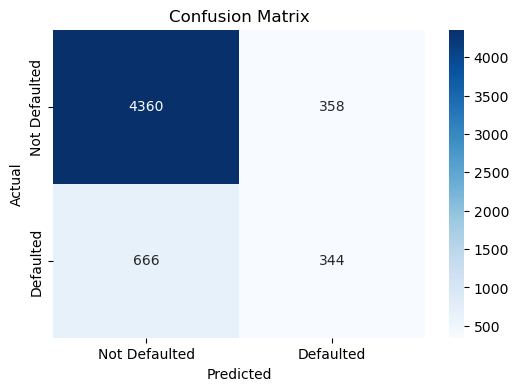

In [116]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot the confusion matrix as a heatmap 
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/var/folders/bx/l07vy1zs4_g4334rgjwy_qdh0000gn/T/ipykernel_29466/1592004644.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Dark2')


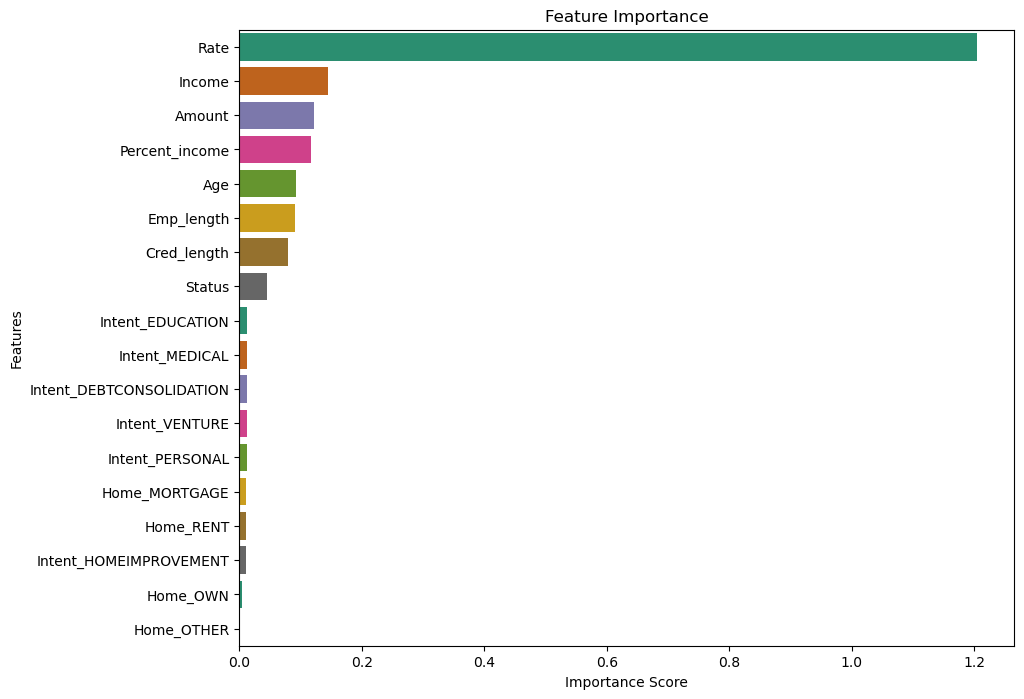

In [117]:
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame 
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances / 0.5
})

# Sort the features by importance 
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Dark2')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()